# GTZAN Dataset - Music Genre Classification

In this notebook we import and explore the data to identify its feature, what they mean and how they relate to our response variable.

## 1. Importing Libraries

In [5]:
%pip install keras --upgrade

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display as lplt
from pathlib import Path
import sklearn
import seaborn as sns
import sklearn.metrics as skm
import sklearn.model_selection as skms
import sklearn.preprocessing as skp
import random
import tensorflow as tf
import keras as k
from keras.models import sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import sgd_experimental
seed = 1432
tf.random.set_seed(seed)

AttributeError: module 'tensorflow.python.training.experimental.mixed_precision' has no attribute '_register_wrapper_optimizer_cls'

## 2. Loading Dataset

In [ ]:
df = pd.read_csv(r'Data\features_3_sec.csv')
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [ ]:
print(f'This dataset has the shape {df.shape}.')

This dataset has the shape (9990, 60).


In [ ]:
music_genres = df.label.unique()
music_genres = [i.title() for i in music_genres]
print(f'The genres presented in the data are:')
for genre in music_genres:
    print(genre)

The genres presented in the data are:
Blues
Classical
Country
Disco
Hiphop
Jazz
Metal
Pop
Reggae
Rock


## 3. Data Visualization

Loading the path of sample songs for each genre.

In [ ]:
songs = {}
for genre in music_genres:
    sample_path = Path(f'Data/genres_original/{genre}/{genre}.00000.wav')
    data, sr = librosa.load(sample_path, sr=45600)
    songs[genre] = data

The main features of audio can be categories as follows:

- Time domain features

- Frequency domain features

- Time-Frequancy domain features

### 3.1 Spectrograms

A spectrogram is a visual representation of a signal's signal strength (or "loudness") across time at various frequencies included in a waveform. Colors represent a third dimension in spectrograms, which are essentially two-dimensional graphs. Along the horizontal axis, time passes from left to right (oldest to youngest). Furthermore, the vertical axis shows frequency (also known as pitch or tone), with the lowest frequencies at the bottom and the highest frequencies at the top. The third dimension, color, represents the amplitude (or energy or "loudness") of a certain frequency at a given moment, with dark blues corresponding to low amplitudes and brighter hues up through red corresponding to progressively stronger (or louder) amplitudes.

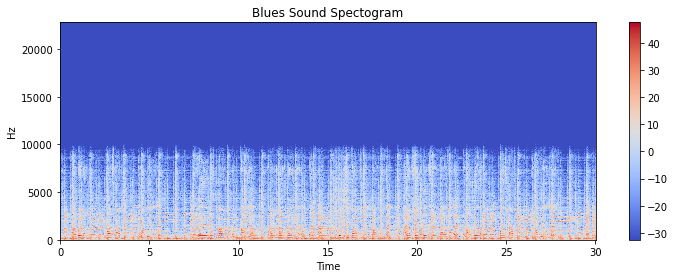

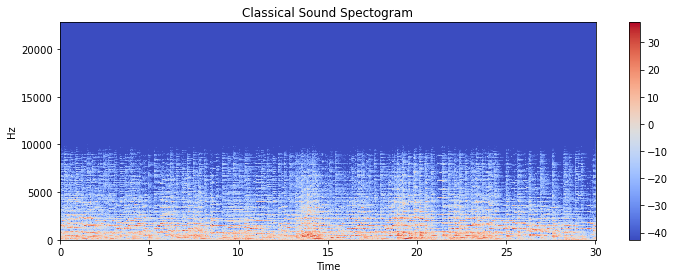

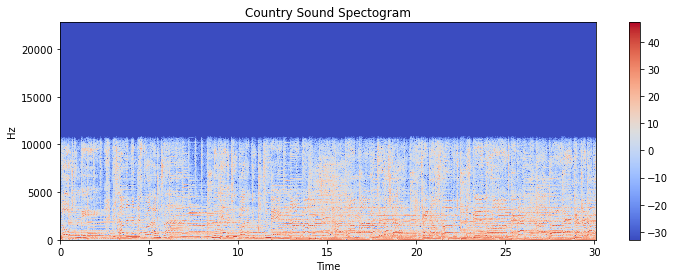

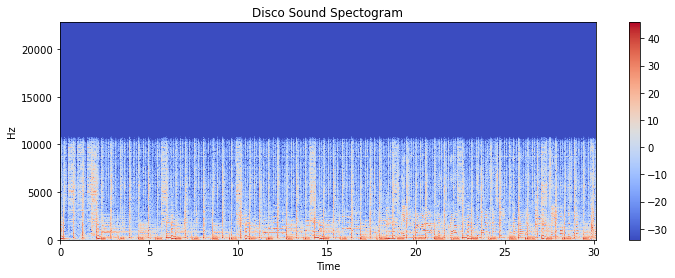

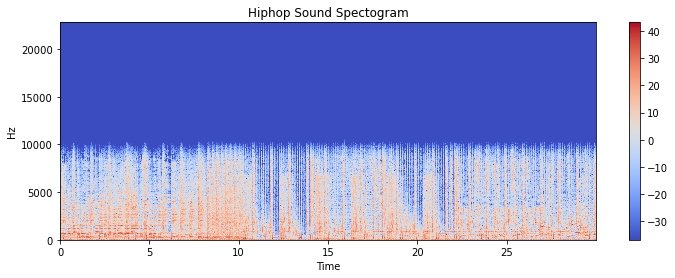

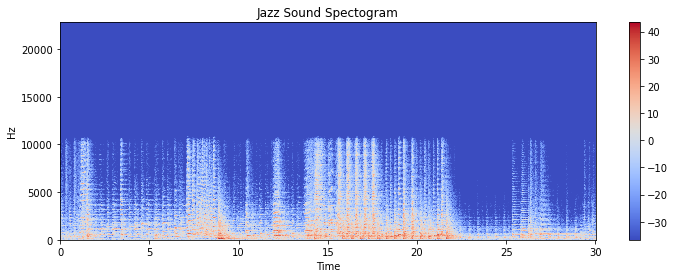

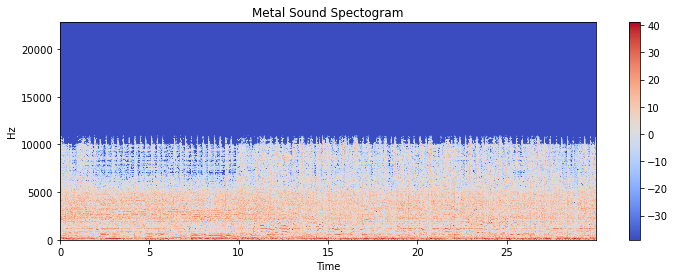

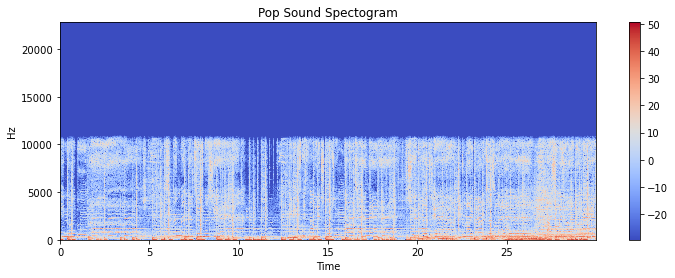

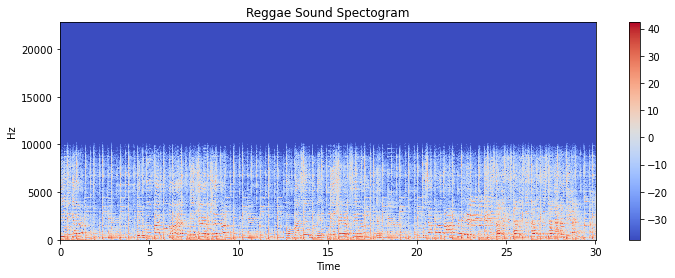

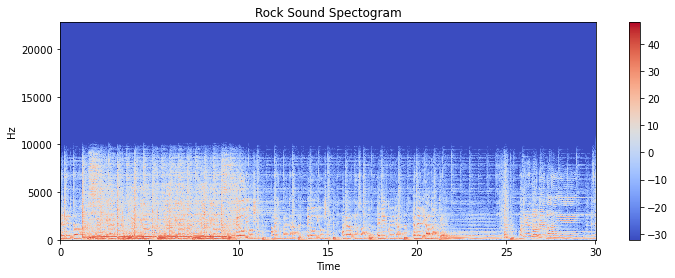

In [ ]:
for genre, tracks in songs.items():
    X = librosa.stft(tracks) #stft -> Short-time Fourier transform
    X_db=librosa.amplitude_to_db(abs(X)) #Translation from amplitude to desibel(db) value
    plt.figure(figsize=(12,4))
    librosa.display.specshow(X_db, sr=sr,x_axis="time",y_axis="hz")
    plt.title(genre + " Sound Spectogram")
    plt.colorbar()

### 3.2 Mel-Frequency Cepstral Coefficients (MFCC)

The mel-frequency cepstrum (MFC) is a representation of a sound's short-term power spectrum based on a linear cosine transform of a log power spectrum on a nonlinear mel scale of frequency used in sound processing. The MFCCs (mel-frequency cepstral coefficients) are the coefficients that make up an MFC (*1st reference here*). They are derived from a nonlinear "spectrum-of-a-spectrum" cepstral representation of the audio sample.

Mel Frequency Cepstral Coefficients (MFCC) are a prominent feature extractor used in audio processing and are widely utilized to extract vital information from a voice signal.

C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2674)
(20, 2674)


C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.2260893  -0.26495975 -0.24018662 ... -0.11315639 -0.06581084
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2680)
(20, 2683)


C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.16259822 -0.1300141  -0.03473616 ... -0.01871183 -0.01749785
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.00900574 -0.01148018 -0.01201465 ...  0.00626728  0.00532277
  0.00275065] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2672)
(20, 2674)


C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.11466005 -0.10642795 -0.06088607 ... -0.03782257 -0.00870064
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.08693509 -0.1038393  -0.09761104 ...  0.01883913  0.0166648
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2672)
(20, 2672)


C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[ 0.01008807  0.00921476  0.00790629 ... -0.04551869 -0.03387891
 -0.01599133] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/952027412.py:2: FutureWarning: Pass y=[-0.03322262 -0.0488135  -0.05501743 ...  0.11454812  0.12427278
  0.06935693] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(tracks)


(20, 2674)
(20, 2674)


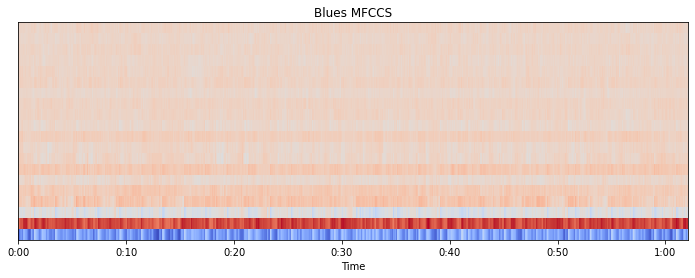

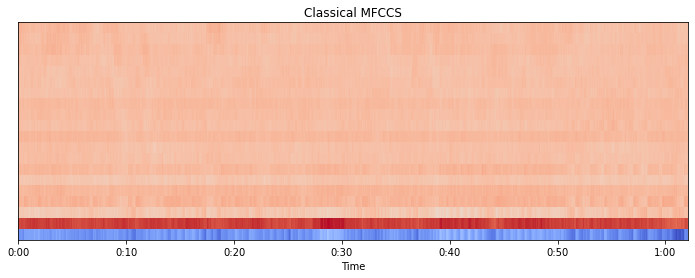

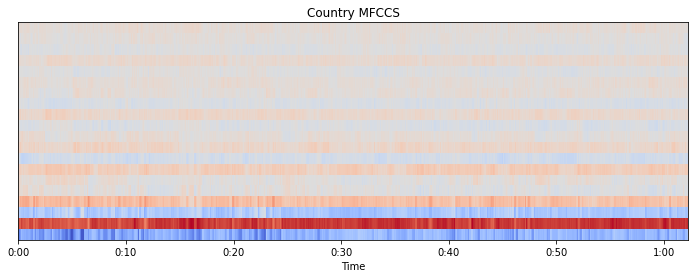

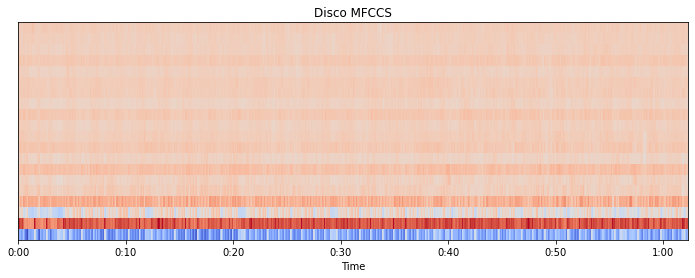

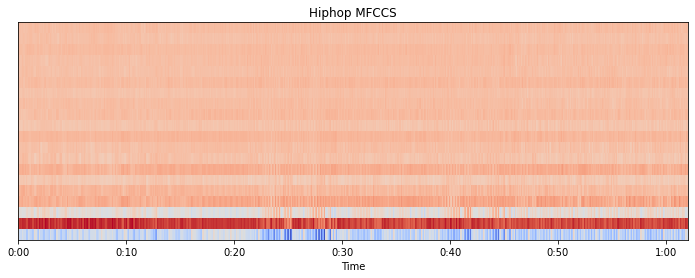

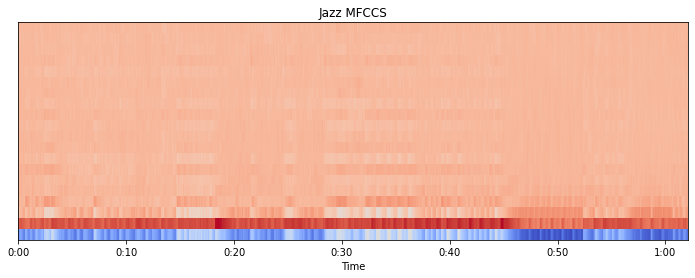

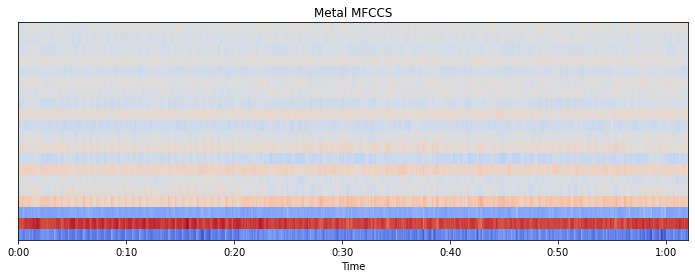

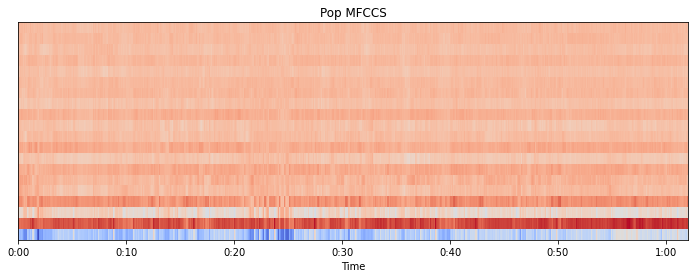

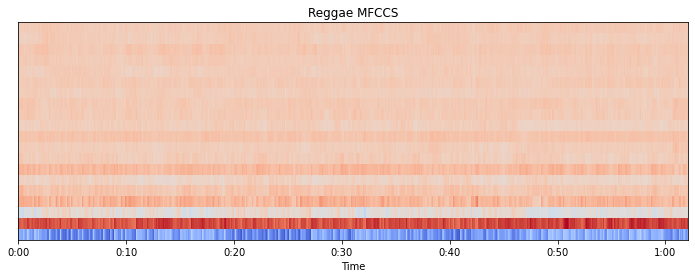

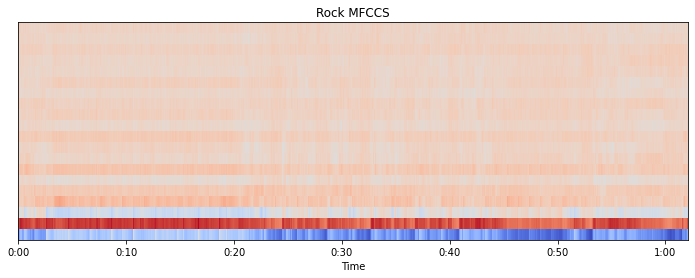

In [ ]:
for genre, tracks in songs.items():
    mfccs = librosa.feature.mfcc(tracks)
    print(mfccs.shape)
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title(genre + ' MFCCS')
    # mfcc=librosa.feature.mfcc(tracks,sr=sr)
    # plt.figure(figsize=(12,4))
    # Iplt.specshow(mfcc,x_axis="s")
    # plt.title(genre + " Mel-Frequency Cepstral Coefficients")
    # plt.colorbar()

### 3.3 Zero Crossing Rate (ZCR)

The rate at which a signal transitions from positive to zero to negative or from negative to zero to positive is known as the zero-crossing rate (ZCR). Its importance has been recognized in speech recognition and music information retrieval, and it is a fundamental element in the classification of percussive sounds.

Zero crossings Blues: 15
Zero crossings Classical: 13
Zero crossings Country: 3
Zero crossings Disco: 10
Zero crossings Hiphop: 21
Zero crossings Jazz: 13
Zero crossings Metal: 31
Zero crossings Pop: 0
Zero crossings Reggae: 10
Zero crossings Rock: 8


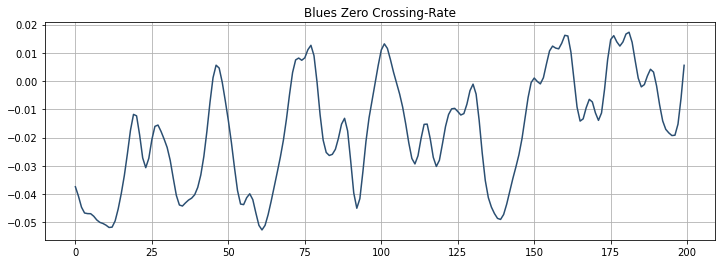

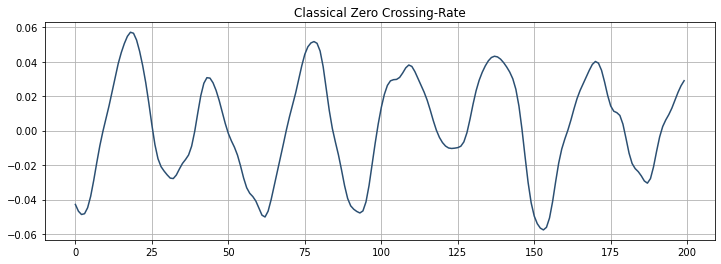

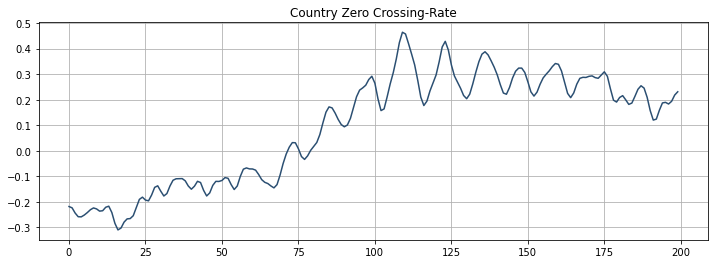

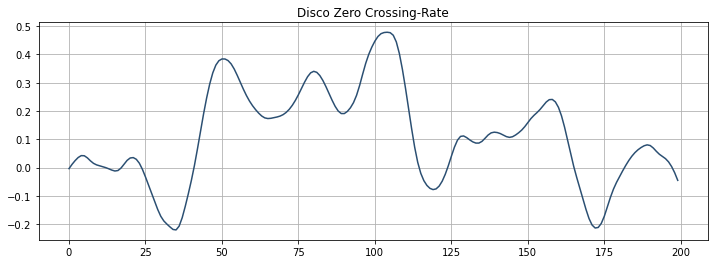

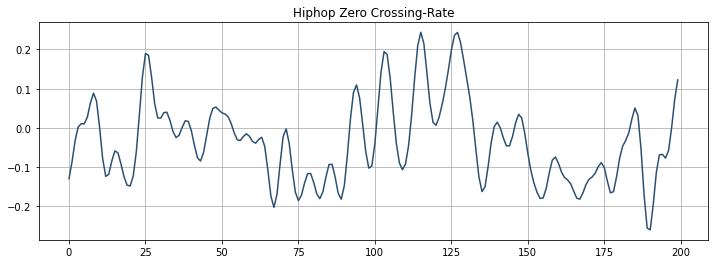

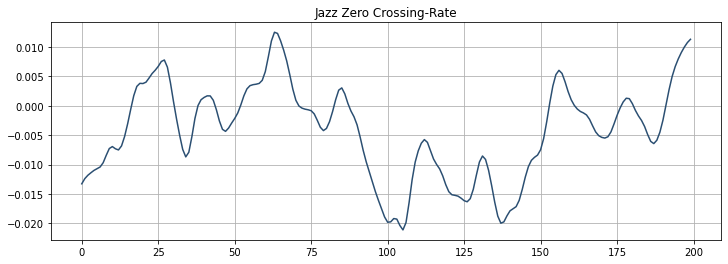

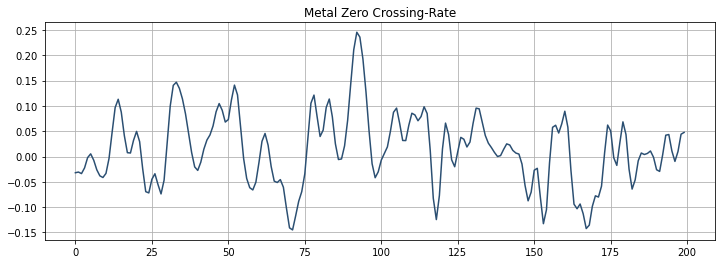

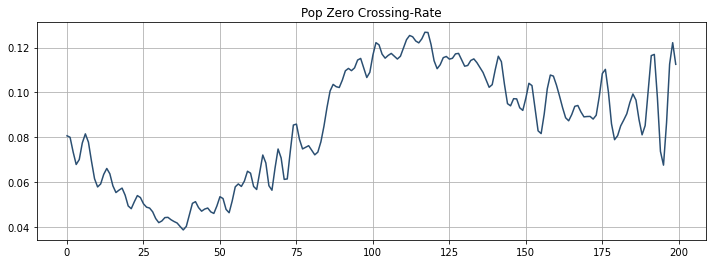

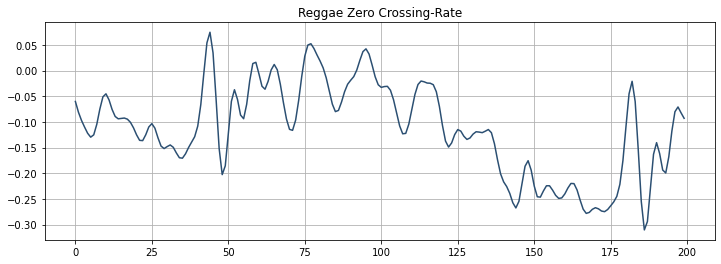

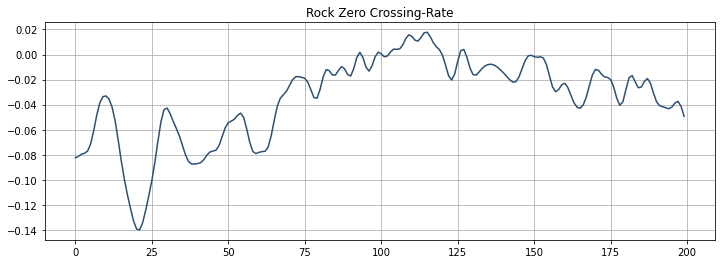

In [ ]:
for genre, tracks in songs.items():
    plt.figure(figsize=(12, 4))
    plt.plot(tracks[1000:1200], color='#2B4F72')
    plt.title(genre + ' Zero Crossing-Rate')
    plt.grid()
    zero_crossings = librosa.zero_crossings(tracks[1000:1200], pad=False)
    print('Zero crossings ' + genre + ':', sum(zero_crossings))

### 3.4 Spectral Centroid

The spectral centroid is a metric used to characterize a spectrum in digital signal processing. It shows where the spectrum's center of mass is located. It has a strong perceptual link with the perception of a sound's brightness.

In [ ]:
# Normalize function for Spectral rolloff
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/1118276403.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/1118276403.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/1118276403.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spe

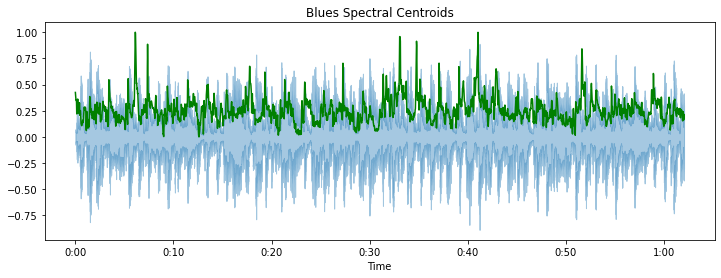

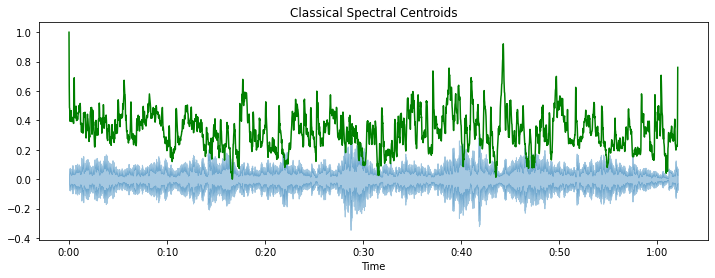

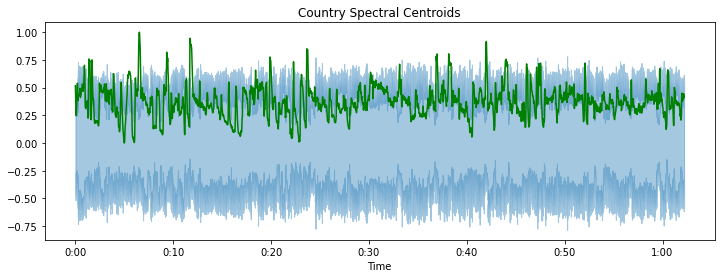

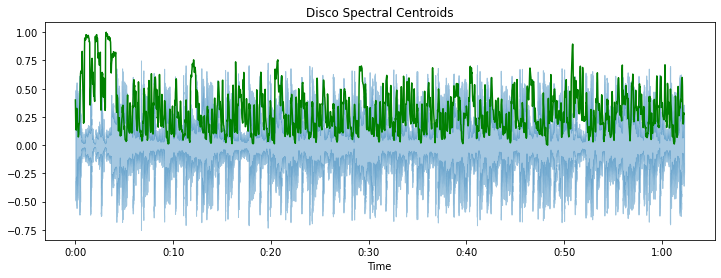

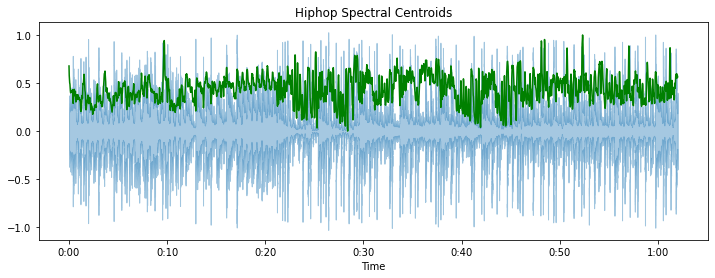

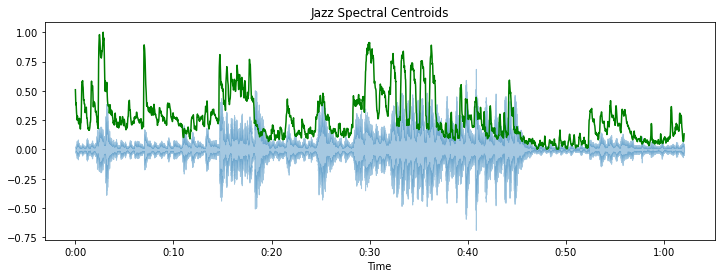

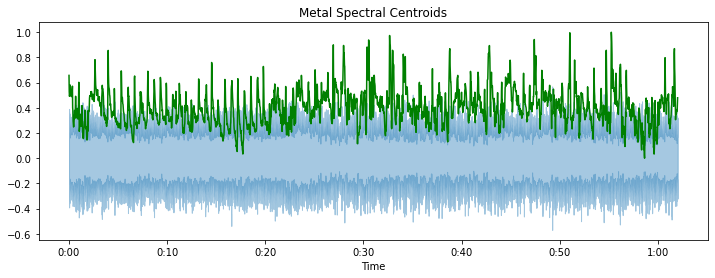

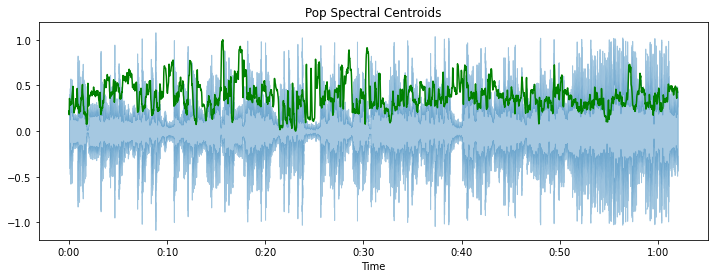

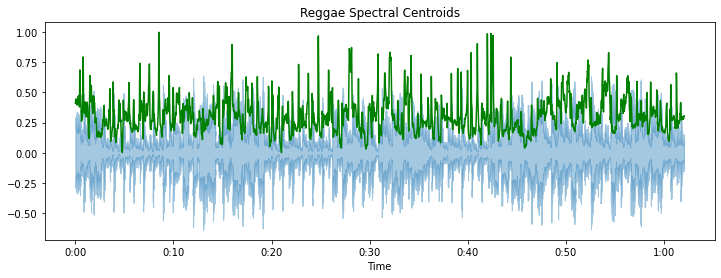

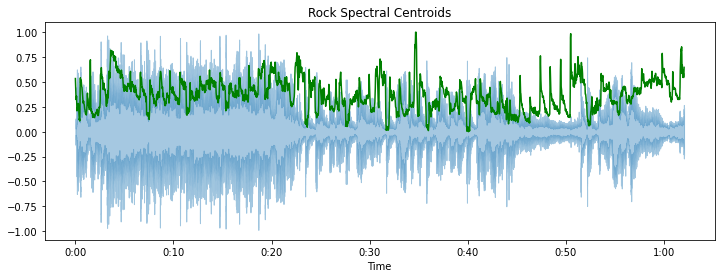

In [ ]:
for genre, tracks in songs.items():
    spectral_centroids = librosa.feature.spectral_centroid(tracks)[0]
    t = librosa.frames_to_time(range(len(spectral_centroids)))
    plt.figure(figsize=(12,4))
    lplt.waveshow(tracks, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='green')
    plt.title(genre + ' Spectral Centroids')

## 3.5 Chroma Feature

The fundamental idea behind chroma features is to combine all spectral data related to a specific pitch class into a single coefficient. It is a powerful sound representation in which 12 components reflect the 12 various halftones (chromas) of the musical octave: A, A#, B, C, C#, D, D#, E, F, F#, G, G#.

C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/668819289.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/668819289.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/668819289.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma = librosa.feature.chroma_stft(tracks)
C:\Users\KATLEG~1.RAM\AppData\Local\Temp

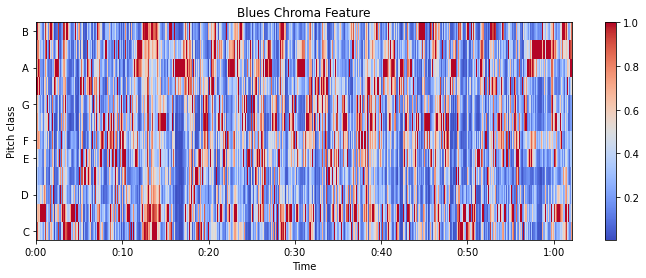

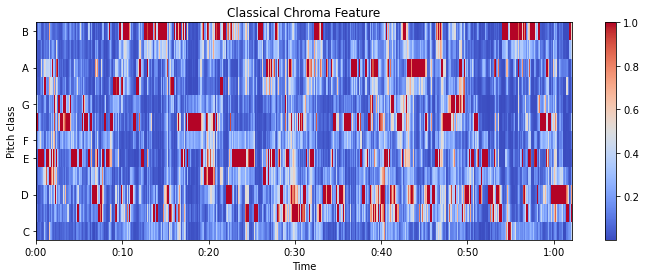

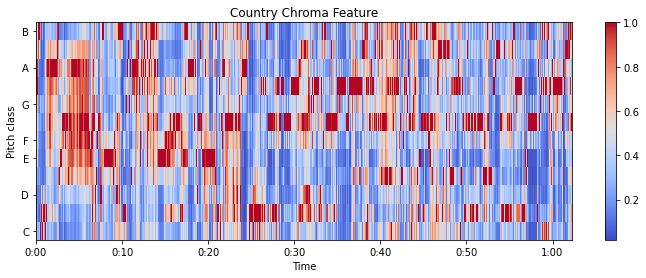

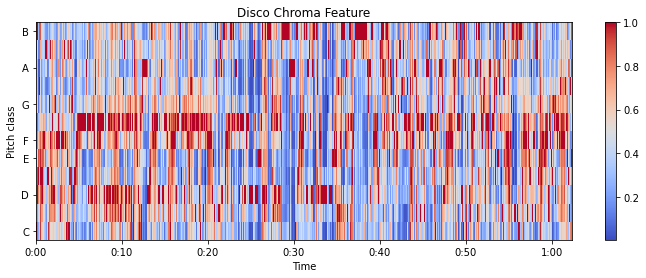

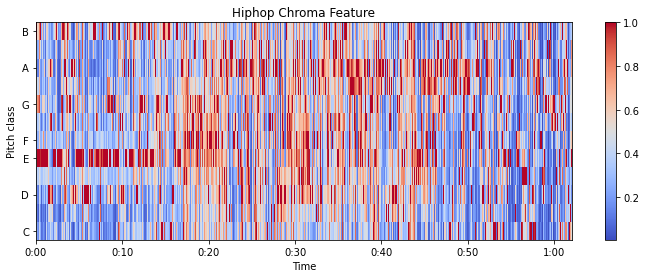

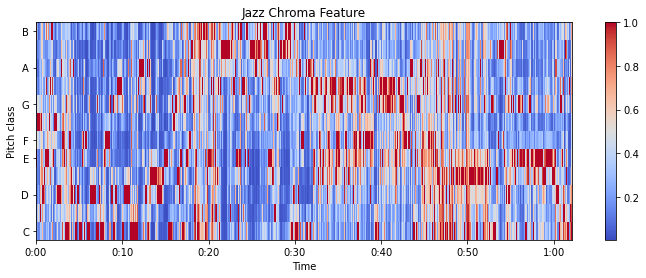

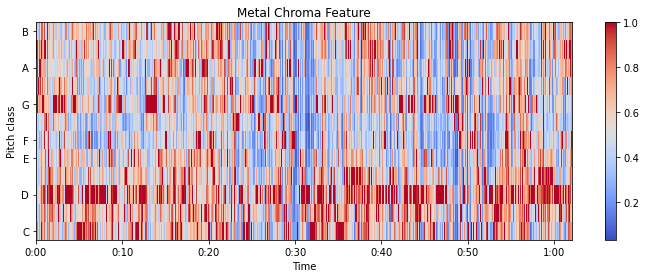

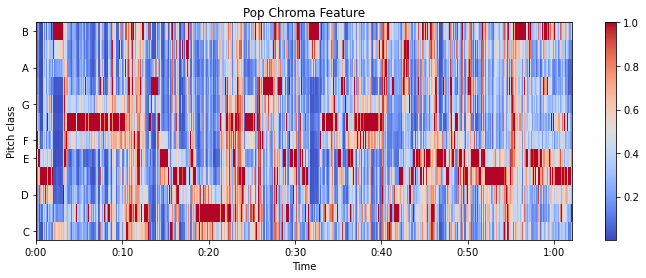

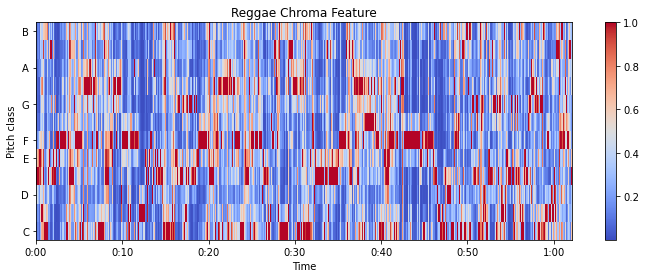

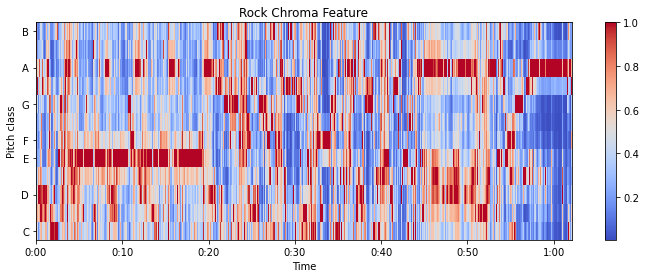

In [ ]:
for genre, tracks in songs.items():
    chroma = librosa.feature.chroma_stft(tracks)
    plt.figure(figsize=(12, 4))
    lplt.specshow(chroma, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(genre + ' Chroma Feature')

### 3.6 Spectral Centroid

The spectral centroid is a metric used to characterize a spectrum in digital signal processing. It shows where the spectrum's center of mass is located. It has a strong perceptual link with the perception of a sound's brightness.

C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/3960419987.py:2: FutureWarning: Pass y=[ 0.00735559  0.01318345  0.01651267 ... -0.07302444 -0.06128362
 -0.03038189] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(track)[0]
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/3960419987.py:2: FutureWarning: Pass y=[-0.01989731 -0.02413581 -0.01835603 ...  0.03505364  0.02989093
  0.01495194] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(track)[0]
C:\Users\KATLEG~1.RAM\AppData\Local\Temp\2/ipykernel_25264/3960419987.py:2: FutureWarning: Pass y=[-0.13281433 -0.18959144 -0.19750676 ...  0.05449507  0.02407495
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spect

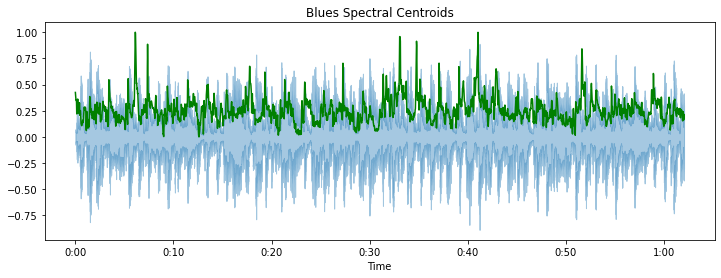

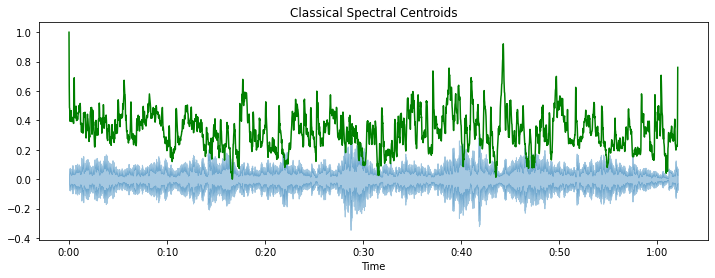

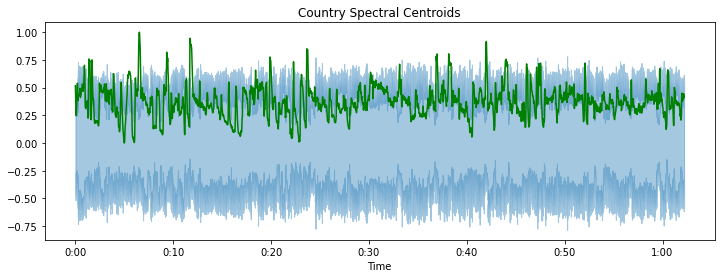

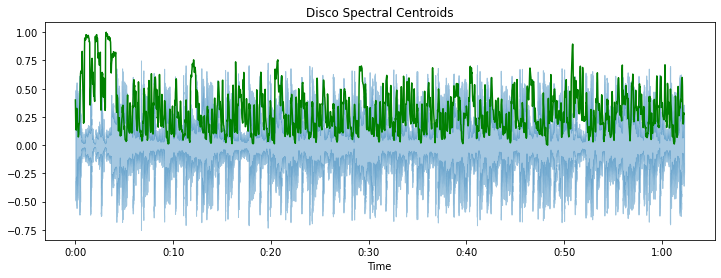

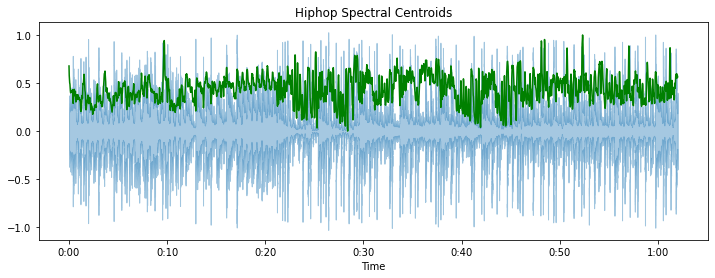

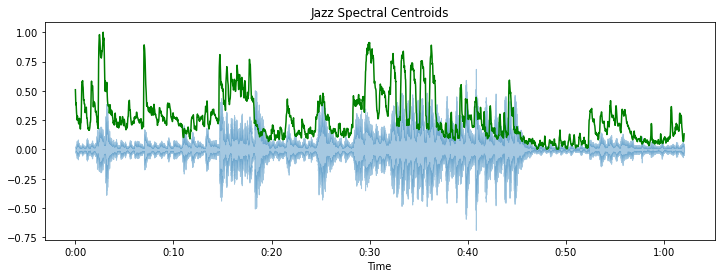

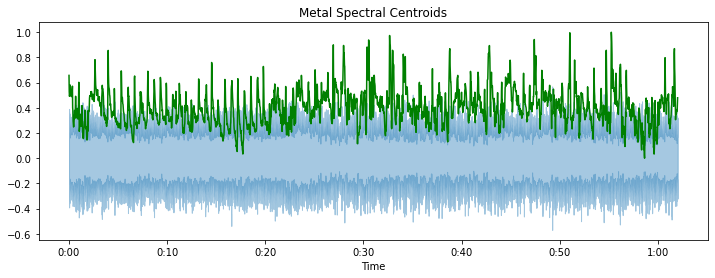

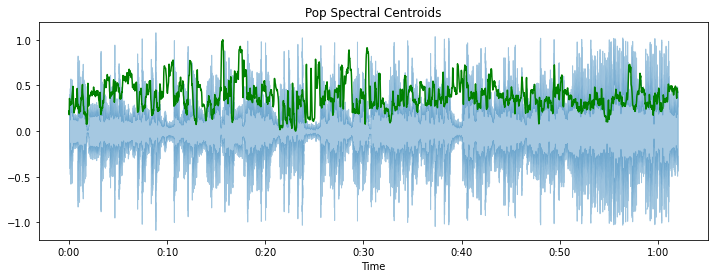

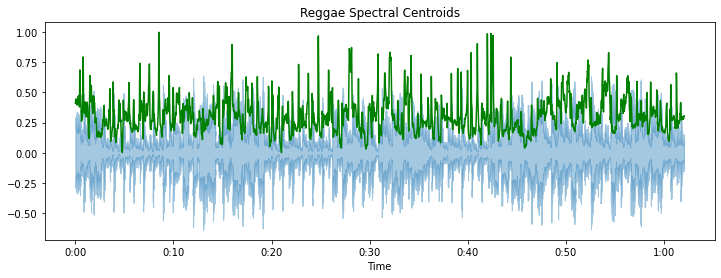

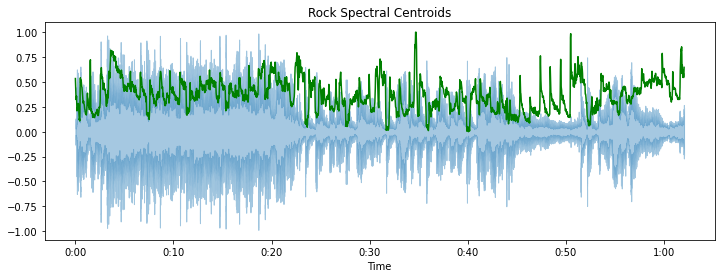

In [ ]:
for genre, track in songs.items():
    spectral_centroids = librosa.feature.spectral_centroid(track)[0]
    t = librosa.frames_to_time(range(len(spectral_centroids)))
    plt.figure(figsize=(12,4))
    lplt.waveshow(track, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='green')
    plt.title(genre + ' Spectral Centroids')

### 3.7 Correlation Matrix

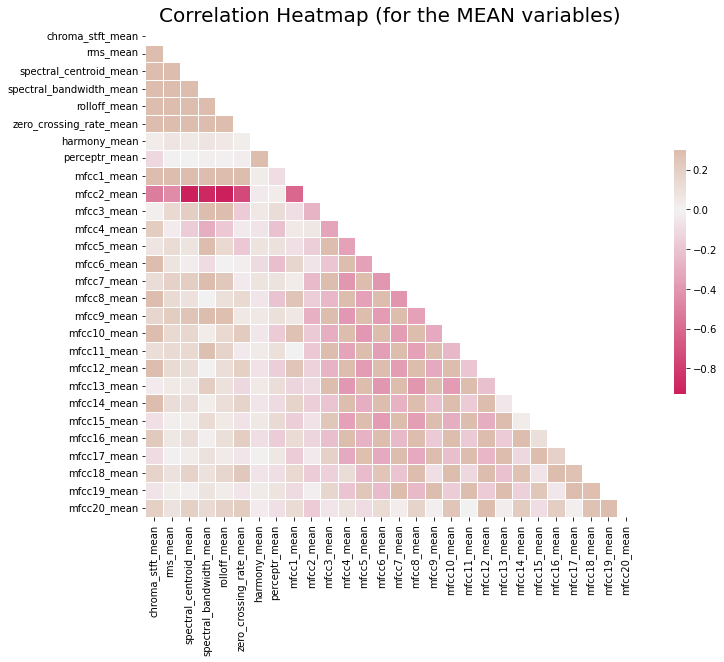

In [ ]:
# Computing the Correlation Matrix
mean_variables = [col for col in df.columns if 'mean' in col]
corr = df[mean_variables].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(14, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 20)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Corr_Heatmap.png")

### 3.8 BPM Boxplot

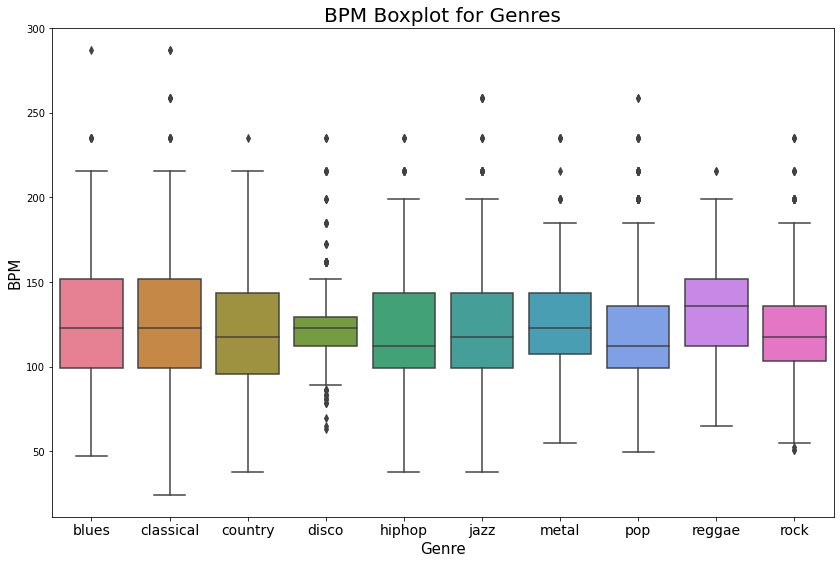

In [ ]:
x = df[["label", "tempo"]]

fig, ax = plt.subplots(figsize=(14, 9))
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'husl')

plt.title('BPM Boxplot for Genres', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10)
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM_Boxplot.png")

## 4. Data Preprocessing

- Addressing missing values
- Encoding Genre Lables

### 4.1 Missing Vaues

In [ ]:
print("Columns with NA values are",list(df.columns[df.isnull().any()]))

Columns with NA values are []


4.2 Encoding Genre Label

In [ ]:
label_index = dict()
index_label = dict()
for i, genre in enumerate(df.label.unique()):
    label_index[genre] = i
    index_label[i] = genre
print(label_index)
print(index_label)

{'blues': 0, 'classical': 1, 'country': 2, 'disco': 3, 'hiphop': 4, 'jazz': 5, 'metal': 6, 'pop': 7, 'reggae': 8, 'rock': 9}
{0: 'blues', 1: 'classical', 2: 'country', 3: 'disco', 4: 'hiphop', 5: 'jazz', 6: 'metal', 7: 'pop', 8: 'reggae', 9: 'rock'}


In [ ]:
df_model = df.copy()
df_model.label = [label_index[l] for l in df_model.label]
df_model.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767      0  
1     5.784063   59.943081      0  
2     2.517375   33.105122      0  
3     3.630866   32.023678      0  
4     0.536961   29.146694      0  

[5 rows x 60 columns]

### Splitting Train and Test Sets

Prepararing the dataset

In [ ]:
# Shuffling samples
seed = 17432
df_model = df.sample(frac=1, random_state=seed).reset_index(drop=True)

# Removing columns which are irrelevant
df_model.drop(['filename', 'length'], axis=1, inplace=True)
df_y = df_model.pop('label')
df_x = df_model



Splitting in train, dev and test sets

In [ ]:
X_train, df_test_valid_X, y_train, df_test_valid_y = skms.train_test_split(df_x, df_y, train_size=0.7, random_state=seed, stratify=df_y)
X_dev, X_test, y_dev, y_test = skms.train_test_split(df_test_valid_X, df_test_valid_y, train_size=0.6, random_state=seed, stratify=df_test_valid_y)

In [ ]:
print('Train set has', X_train.shape[0], 'records from the total', len(df_model), 'records, making up', round(X_train.shape[0]/len(df_model)*100),'%')
print('Validation set has', X_dev.shape[0], 'records from the total', len(df_model), 'records, making up', round(X_dev.shape[0]/len(df_model)*100),'%')
print('Validation set has', X_test.shape[0], 'records from the total', len(df_model), 'records, making up', round(X_test.shape[0]/len(df_model)*100),'%')

Train set has 6993 records from the total 9990 records, making up 70 %
Validation set has 1798 records from the total 9990 records, making up 18 %
Validation set has 1199 records from the total 9990 records, making up 12 %


Feature scaling

In [ ]:
scaler = skp.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_dev = pd.DataFrame(scaler.transform(X_dev), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

X_test.head()

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0         -1.607838         0.444569 -1.478955 -0.678029   
1         -0.913222        -0.047373 -1.227082 -0.675013   
2          0.053698         0.759533  2.014064  1.279646   
3          0.764491        -1.630687 -0.359064 -0.699634   
4         -0.182521        -0.548578  0.533156 -0.390906   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               -1.912912              -0.938474                -1.908710   
1               -0.771812              -0.819772                -1.096689   
2                0.967059               1.123552                 1.836873   
3                0.630319              -0.436914                 0.169966   
4                0.104635              -0.576471                -0.062230   

   spectral_bandwidth_var  rolloff_mean  rolloff_var  ...  mfcc16_mean  \
0               -0.581477     -2.190929    -1.072109  ...    -0.896042   
1               -0.968705     -0.897110    -0.957909  ...     0.672614   
2                0.588330      1.521356     0.970230  ...     0.160308   
3               -0.335500      0.533249    -0.436231  ...     1.169734   
4               -0.607425      0.014912    -0.410954  ...     0.759957   

   mfcc16_var  mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  \
0   -0.699649     0.894264   -0.688181    -0.205680   -0.683642     0.062437   
1    0.554789     0.218003    1.579317    -0.405014    0.537463     0.349368   
2    0.238498     1.180138    0.516551    -0.372602    1.278307     0.622376   
3   -0.623733    -0.753321   -0.556810     0.917154   -0.464844    -1.848562   
4   -0.707156    -1.824884   -0.629569    -0.391428    0.384653     0.020586   

   mfcc19_var  mfcc20_mean  mfcc20_var  
0   -0.185621     0.277288   -0.454378  
1    0.252842     0.423305   -0.495332  
2    0.422836    -0.110515   -0.011250  
3   -0.767459     1.337713   -0.445252  
4    0.328428     0.088547    0.447402  

[5 rows x 57 columns]

### Building the Model

In [ ]:
ACCURACY_THRESHOLD = 0.94

class myCallback(k.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):
            print("\n\nStopping training as we have reached %2.2f%% accuracy!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True

def trainModel(model, epochs, optimizer):
    batch_size = 128
    callback = myCallback()
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics='accuracy'
    )
    return model.fit(X_train, y_train, validation_data=(X_dev, y_dev), epochs=epochs, 
                     batch_size=batch_size, callbacks=[callback])

def plotHistory(history):
    print("Max. Validation Accuracy",max(history.history["val_accuracy"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

NameError: name 'k' is not defined

In [ ]:
model_1 = k.models.Sequential([
    k.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    k.layers.Dense(128, activation='relu'),
    k.layers.Dense(64, activation='relu'),
    k.layers.Dense(10, activation='softmax'),
])
print(model_1.summary())
model_1_history = trainModel(model=model_1, epochs=70, optimizer='adam')

In [ ]:
model = sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add()
layers.Dense(128, activation='relu')
layers.Dense(64, activation='relu')
layers.Dense(10, activation='softmax')